In this code, we will use rotation around y axis to replace bit flip error. In real quantum computer, due to the transverse noise, the qubit will rotate from $\left|0\right\rangle$ to $\left|1\right\rangle$. It is also known as the longitudinal relaxation. If a $\left|0\right\rangle$ state rotate around y axis by $\theta$ , the state becomes 

$\left|\psi\right\rangle =\cos\frac{\theta}{2}\left|0\right\rangle +\sin\frac{\theta}{2}\left|1\right\rangle $.

Once one measures the state, he or she can get the $\left|0\right\rangle$ with probability $(\cos^2(\theta))$. Here, we will apply the bit-flip code on this situation and see whether bit-flip can work for this case as well. 

In [9]:
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector


In [2]:
## SETUP
# Protocol uses 3 qubits and 1 classical bit in a register
qr = QuantumRegister(3, name="q")    # Protocol uses 4 qubits
cr1 = ClassicalRegister(1, name="cr1") # and 2 classical bit
#cr2 = ClassicalRegister(1, name="cr2")
bit_flip_circuit = QuantumCircuit(qr,cr1)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

In [4]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:  
p = 0.25 # p stands for the probability of fliping the state of the qubit
psi = [np.sqrt(p), np.sqrt(1-p)]
init_gate = Initialize(psi) # initialize the superposition state
init_gate.label = "init"

In [5]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [6]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    qc.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

In the middle of the ciruit, we use the three rotational operator for each qubit to replace the error simulation.

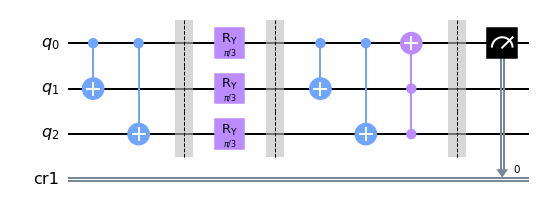

In [7]:
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
#bit_flip_circuit.append(Er,[0,1,2,3])
#error_simulation(bit_flip_circuit, 0, 1, 2, p)
bit_flip_circuit.barrier()

bit_flip_circuit.ry(np.pi/3,0)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.ry(np.pi/3,1)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.ry(np.pi/3,2)# Here rotate the spin around x axis by pi/3 so that the state will become 1/2|0>+sqrt(3)/2|1>

bit_flip_circuit.barrier()

# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

# step 4. measurement
measure(bit_flip_circuit, 0, 0)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

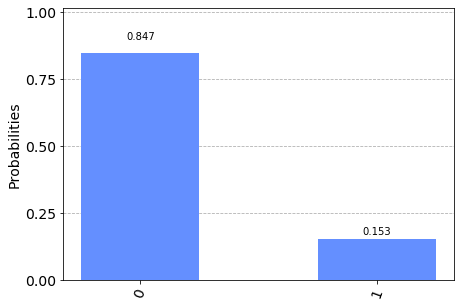

In [8]:

backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)

Which is higher than original probability 75% $(\cos^2(\pi/6))$. That means the bit flip code can deal with the Qubit suffer from the transverse noise.